In [30]:
%matplotlib inline

import os
dirname = "/Users/aphearin/Dropbox/published_age_matching"
basename = "published_mr_gr_dark_side1_mock.hdf5"
age_matching = Table.read(os.path.join(dirname, basename), path='data')


In [2]:
from astropy.table import Table

fname = "/Users/aphearin/Dropbox/protoDC2/value_added_protoDC2_snapnum_487.hdf5"
protoDC2_z0 = Table.read(fname, path='data')
    
from rescale_dc2.load_catalogs import load_closest_available_umachine_catalog
umachine_z0 = load_closest_available_umachine_catalog(0.)

from rescale_dc2.load_catalogs import load_dc2_sdss
sdss = load_dc2_sdss()

In [3]:
from rescale_dc2.rescale_snapshot import rescale_stellar_mass
rescaled_mstar_dc2 = rescale_stellar_mass(protoDC2_z0, umachine_z0)

In [4]:
from rescale_dc2.rescale_snapshot import rescale_ssfr
rescaled_ssfr_dc2 = rescale_ssfr(rescaled_mstar_dc2, umachine_z0)

In [5]:
from rescale_dc2.rescale_snapshot import assign_sdss_restframe_absolute_ugriz
dc2 = assign_sdss_restframe_absolute_ugriz(rescaled_ssfr_dc2, sdss)

print(dc2.keys())

['magnitude:SDSS_u:rest', 'magnitude:SDSS_g:rest', 'magnitude:SDSS_r:rest', 'magnitude:SDSS_i:rest', 'magnitude:SDSS_z:rest', 'infallHaloMass', 'hostHaloMass', 'hostIndex', 'isCentral', 'spheroidMassStellar', 'totalMassStellar', 'galaxyID', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'totalStarFormationRate', 'totalStarFormationRate_percentile_fixed_totalMassStellar', 'host_mass_bin', 'rescaled_mstar', 'ssfr', 'remapped_ssfr', 'remapped_ssfr_no_scatter', 'matched_mstar', 'AbsMagu', 'AbsMagg', 'AbsMagr', 'AbsMagi', 'AbsMagz']


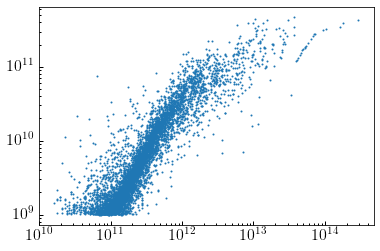

In [6]:
cenmask = dc2['isCentral'] == 1

fig, ax = plt.subplots(1, 1)

__=ax.loglog()
nskip = 100
__=ax.scatter(dc2['hostHaloMass'][cenmask][::nskip], 
              dc2['rescaled_mstar'][cenmask][::nskip], s=1)

In [7]:
from halotools.mock_observables import tpcf, return_xyz_formatted_array

log_rbins = np.linspace(-1, 1.25, 25)
rbins = 10**log_rbins
rmids = 10**(0.5*(log_rbins[:-1] + log_rbins[1:]))

sm_cut = 10**10
um_pos = return_xyz_formatted_array(
    umachine_z0['x'], umachine_z0['y'], umachine_z0['z'], 
    mask=umachine_z0['obs_sm']>sm_cut)

pdc2_pos = return_xyz_formatted_array(
    dc2['x'], dc2['y'], dc2['z'], mask=dc2['rescaled_mstar']>sm_cut)

xi_um = tpcf(um_pos, rbins, period=250)

xi_pdc2 = tpcf(pdc2_pos, rbins, period=256)



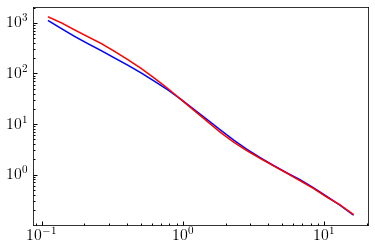

In [8]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rmids, xi_um, color='blue')
__=ax.plot(rmids, xi_pdc2, color='red')

In [9]:
(xi_pdc2-xi_um)/xi_um

array([ 0.18863285,  0.30094569,  0.34543583,  0.36976742,  0.38150357,
        0.34947129,  0.28500131,  0.22610903,  0.14890627,  0.05840446,
       -0.01454626, -0.04569681, -0.07985622, -0.1047217 , -0.09051329,
       -0.06050378, -0.03564112, -0.02255428, -0.02035349, -0.04690065,
       -0.03204188, -0.03399063,  0.0103905 ,  0.02340427])

In [10]:
mask_r1 = dc2['AbsMagr'] < -18.5
np.count_nonzero(mask_r1)

820852

In [11]:
from halotools.mock_observables import return_xyz_formatted_array, wp

rp_bins = np.logspace(-1, 1.35, 25)
rp_mids = 10**(0.5*(np.log10(rp_bins[:-1]) + np.log10(rp_bins[1:])))
pi_max = 20.

mask_r1 = dc2['AbsMagr'] < -18.5
mask_r2 = dc2['AbsMagr'] < -20.5
mask_r3 = dc2['AbsMagr'] < -22

pos_r1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_r2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_r3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_r3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

wp_r1 = wp(pos_r1, rp_bins, pi_max, period=256., num_threads='max')
wp_r2 = wp(pos_r2, rp_bins, pi_max, period=256., num_threads='max')
wp_r3 = wp(pos_r3, rp_bins, pi_max, period=256., num_threads='max')


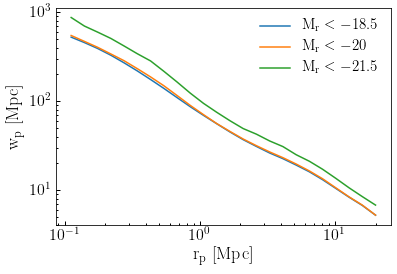

In [27]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_r1, label=r'${\rm M_{r} < -18.5}$')
__=ax.plot(rp_mids, wp_r2, label=r'${\rm M_{r} < -20}$')
__=ax.plot(rp_mids, wp_r3, label=r'${\rm M_{r} < -21.5}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

figname = 'luminosity_dependent_clustering.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')

In [ ]:
mask_i1 = dc2['AbsMagi'] < -18.5
mask_i2 = dc2['AbsMagi'] < -20.5
mask_i3 = dc2['AbsMagi'] < -22

pos_i1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_i2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_i3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_i3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(dc2['AbsMagi'], bins=50)
# xlim = ax.set_xlim(-16, -23)

wp_i1 = wp(pos_i1, rp_bins, pi_max, period=256., num_threads='max')
wp_i2 = wp(pos_i2, rp_bins, pi_max, period=256., num_threads='max')
wp_i3 = wp(pos_i3, rp_bins, pi_max, period=256., num_threads='max')


In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_i1, label=r'${\rm M_{i} < -18.5}$')
__=ax.plot(rp_mids, wp_i2, label=r'${\rm M_{i} < -20.5}$')
__=ax.plot(rp_mids, wp_i3, label=r'${\rm M_{i} < -22}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

In [ ]:
mask_g1 = dc2['AbsMagi'] < -19
mask_g2 = dc2['AbsMagi'] < -20.5
mask_g3 = dc2['AbsMagi'] < -22

pos_g1 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g1, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_g2 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g2, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)
pos_g3 = return_xyz_formatted_array(
        dc2['x'], dc2['y'], dc2['z'], mask=mask_g3, 
        velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

# fig, ax = plt.subplots(1, 1)

# __=ax.hist(dc2['AbsMagg'], bins=50)
# xlim = ax.set_xlim(-16, -23)

wp_g1 = wp(pos_g1, rp_bins, pi_max, period=256., num_threads='max')
wp_g2 = wp(pos_g2, rp_bins, pi_max, period=256., num_threads='max')
wp_g3 = wp(pos_g3, rp_bins, pi_max, period=256., num_threads='max')


In [ ]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rp_mids, wp_g1, label=r'${\rm M_{g} < -18.5}$')
__=ax.plot(rp_mids, wp_g2, label=r'${\rm M_{g} < -20.5}$')
__=ax.plot(rp_mids, wp_g3, label=r'${\rm M_{g} < -22}$')

xlabel = ax.set_xlabel(r'${\rm r_{p}\ [Mpc]}$')
ylabel = ax.set_ylabel(r'${\rm w_{p}\ [Mpc]}$')

legend = ax.legend()

In [ ]:
print(dc2.keys())

In [ ]:
low_sm1, high_sm1 = 9.75, 10
sm_mask1 = dc2['rescaled_mstar'] > 10**low_sm1
sm_mask1 *= dc2['rescaled_mstar'] < 10**high_sm1

low_sm2, high_sm2 = 10.5, 10.75
sm_mask2 = dc2['rescaled_mstar'] > 10**low_sm2
sm_mask2 *= dc2['rescaled_mstar'] < 10**high_sm2

fig, ax = plt.subplots(1, 1)

__=ax.hist(dc2['AbsMagr'][sm_mask1], bins=50, normed=True, alpha=0.8)
__=ax.hist(dc2['AbsMagr'][sm_mask2], bins=50, normed=True, alpha=0.8)

In [45]:
from halotools.mock_observables import wp, tpcf, return_xyz_formatted_array

log_rbins = np.linspace(-1, 1.25, 25)
rbins = 10**log_rbins
rmids = 10**(0.5*(log_rbins[:-1] + log_rbins[1:]))

pi_max = 40.

In [60]:
mr_cut = -20
gr_cut = 0.65

magr_mask = dc2['AbsMagr'] < mr_cut

red_mask = magr_mask & (dc2['AbsMagg']-dc2['AbsMagr'] >= gr_cut)
blue_mask = magr_mask & (dc2['AbsMagg']-dc2['AbsMagr'] < gr_cut)

pos_red = return_xyz_formatted_array(
    dc2['x'], dc2['y'], dc2['z'], mask=red_mask, 
    velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

pos_blue = return_xyz_formatted_array(
    dc2['x'], dc2['y'], dc2['z'], mask=blue_mask, 
    velocity=dc2['vz'], velocity_distortion_dimension='z', period=256.)

wp_red = wp(pos_red, rbins, pi_max, period=256., num_threads='max')
wp_blue = wp(pos_blue, rbins, pi_max, period=256., num_threads='max')



magr_mask_agm = age_matching['magr'] < mr_cut

red_mask_agm = magr_mask_agm & (age_matching['gr'] >= gr_cut)
blue_mask_agm = magr_mask_agm & (age_matching['gr'] < gr_cut)

pos_red_agm = return_xyz_formatted_array(
    age_matching['pos'][:, 0], age_matching['pos'][:, 1], 
    age_matching['pos'][:, 2], mask=red_mask_agm, 
    velocity=age_matching['vel'][:, 2], velocity_distortion_dimension='z', period=250.)

pos_blue_agm = return_xyz_formatted_array(
    age_matching['pos'][:, 0], age_matching['pos'][:, 1], 
    age_matching['pos'][:, 2], mask=blue_mask_agm, 
    velocity=age_matching['vel'][:, 2], velocity_distortion_dimension='z', period=250.)

wp_red_agm = wp(pos_red_agm, rbins, pi_max, period=250., num_threads='max')
wp_blue_agm = wp(pos_blue_agm, rbins, pi_max, period=250., num_threads='max')


# xi_red_agm = tpcf(pos_red_agm, rbins, period=250., num_threads='max')
# xi_blue_agm = tpcf(pos_blue_agm, rbins, period=250., num_threads='max')




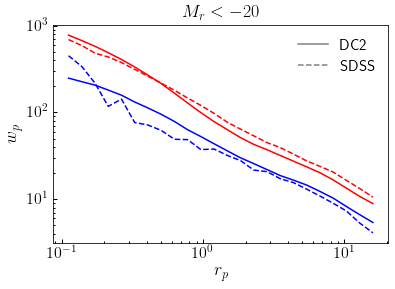

In [62]:
fig, ax = plt.subplots(1, 1)

__=ax.loglog()

__=ax.plot(rmids, wp_red, color='red', label='DC2')
__=ax.plot(rmids, wp_blue, color='blue')

__=ax.plot(rmids, wp_red_agm, '--', color='red', label='SDSS')
__=ax.plot(rmids, wp_blue_agm, '--', color='blue')

legend = ax.legend()
legend.legendHandles[0].set_color('gray')
legend.legendHandles[1].set_color('gray')


title = ax.set_title(r'$M_{r} < -20$')
xlabel = ax.set_xlabel(r'$r_{p}$')
ylabel = ax.set_ylabel(r'$w_{p}$')

figname = 'color_dependent_clustering.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel, ylabel], bbox_inches='tight')